#### demonstration of the filtering steps applied to raw eye-tracking data

In [23]:
from __future__ import division
import os
import sys
import pandas as pd
import numpy as np
import cv2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [2]:
raw_df = pd.read_table('../../Results/AVB_0055/AVB_0055_eyeData.txt')

In [35]:
# extract the data from a single trial
trialNum = 1
trial_df = raw_df[raw_df.trialNum == trialNum]

## Raw Data Filtering

In [36]:
# grab the X,Y values for fixation cross
fixCrossX = trial_df['fix-X'].iloc[0]
fixCrossY = trial_df['fix-Y'].iloc[0]

# isolate the timepoints during the "image" portion of each trial
trial_df = trial_df[trial_df.stimType == 'image']

# make a copy for comparison purposes later on
ORIG_trial_df = trial_df.copy()

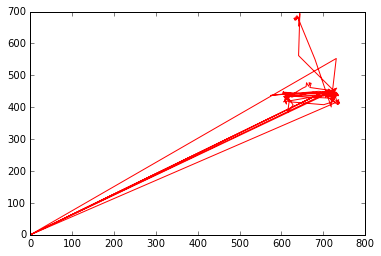

In [37]:
# Plot the raw gaze locations
plt.plot(trial_df['gaze-X'], trial_df['gaze-Y'], 'r-')

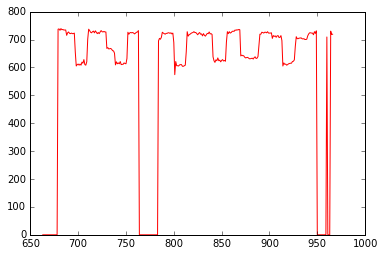

In [38]:
# plot just the X-values
plt.plot(trial_df['gaze-X'], 'r-')

#### interpolate over missing data points

In [91]:
# Set sampling frequency
sampleHz = 60

# set invalid gaze pts to None
trial_df.loc[trial_df.validity > 0, 'gaze-X':'gaze-Y'] = np.nan

# maximum window size (in ms) to interpolate over
max_interp_window = 100 

# convert interp_window from ms to # of samples
interp_limit = np.floor(max_interp_window/(1/sampleHz*1000))

# interpolate missing values within window limits
for col in ['gaze-X', 'gaze-Y']:
    trial_df[col].interpolate(limit=interp_limit, 
                             limit_direction='both',
                             inplace=True)


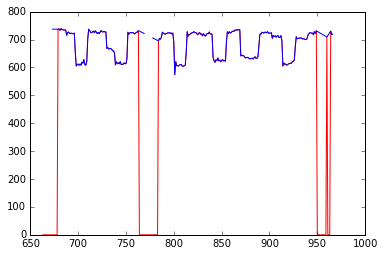

In [93]:
# plot the original x-gaze
plot(ORIG_trial_df['gaze-X'], '-r')

# plot the interpolated x-gaze
plot(trial_df['gaze-X'], '-b')

In [95]:
# translate gaze coordinates to be relative to the stimulus (instead of screen)
stimLocation = [trial_df['rect-X1'].iloc[0], trial_df['rect-X1'].iloc[1]] # [x1,y1] of stimulus on screen
trial_df['gaze-X'] = trial_df['gaze-X'] - stimLocation[0]
trial_df['gaze-Y'] = trial_df['gaze-Y'] - stimLocation[1]

# do the same for the fixation cross location col
trial_df['fix-X'] = trial_df['fix-X'] - stimLocation[0]
trial_df['fix-Y'] = trial_df['fix-Y'] - stimLocation[1]

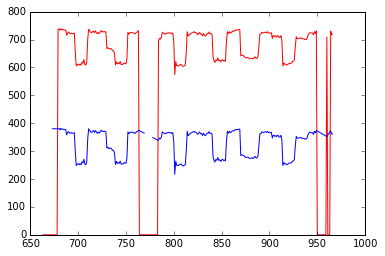

In [96]:
# plot the original x-gaze
plot(ORIG_trial_df['gaze-X'], '-r')

# plot the translated x-gaze
plot(trial_df['gaze-X'], '-b')